 # Bank Marketing

 ### Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

 ## 1. Data upload and first study

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn

In [5]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Bank_Marketing/bank-additional-full.csv', sep=';')

In [7]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Check duplicates
df.duplicated().sum()

12

In [11]:
df.drop_duplicates(inplace=True)

In [13]:
# Check other duplicate
object_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['DateCrawled', 'DateCreated', 'LastSeen']]



for col in object_columns:
    print(df[col].value_counts())
    print()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

contact
cellular     26135
telephone    15041
Name: count, dty

In [17]:
# Replace No by 0 and Yes by 1

df['y'] = df['y'].replace({'yes': 1, 'no': 0})
print(df['y'].value_counts())

y
0    36537
1     4639
Name: count, dtype: int64


 ## Analysis of data

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [22]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']] # choice all features
num_cols = 2 # Amount of columns
num_rows = (len(df_describe.columns) + num_cols - 1) // num_cols # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

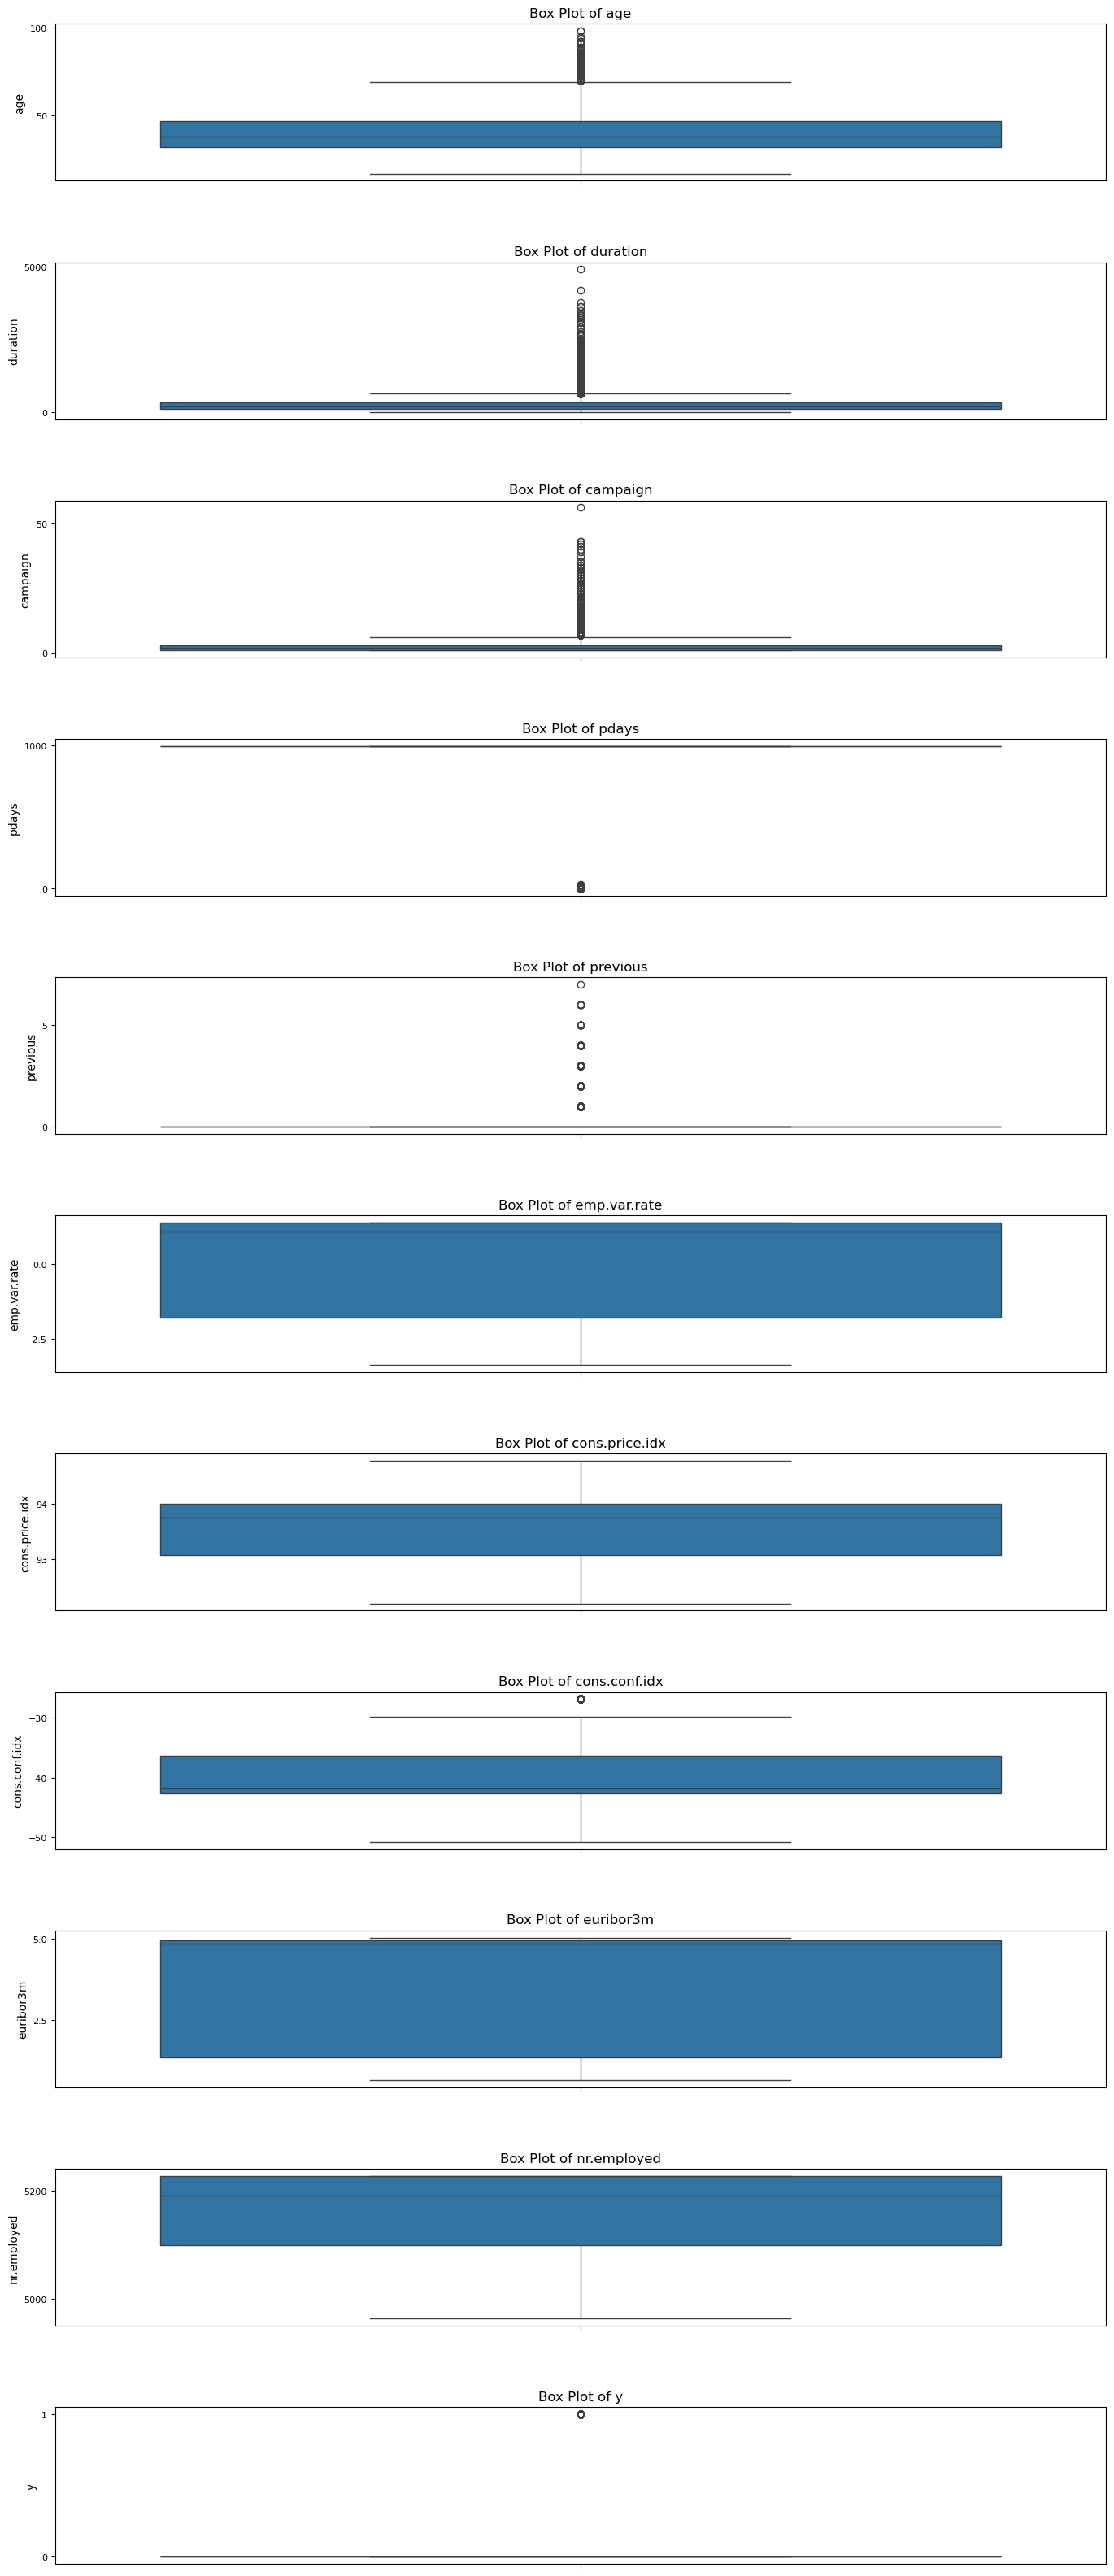

In [26]:
# Choose numerical columns
numerical_features = df.select_dtypes(include=['number'])

# Setting size
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Creating plot for every column
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Create a subplot
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Title font size
    plt.ylabel(feature, fontsize=10)  # Y-axis label font size
    plt.xlabel('')  # Remove X-axis label if not needed
    
    # Increase font size of axis labels
    plt.xticks(fontsize=8)  # X-axis tick label font size
    plt.yticks(fontsize=8)  # Y-axis tick label font size

plt.tight_layout()  # Automatically adjusts subplots
plt.show()

 #### Build a matrix of dependences for target

interval columns not set, guessing: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_7528/1297827602.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


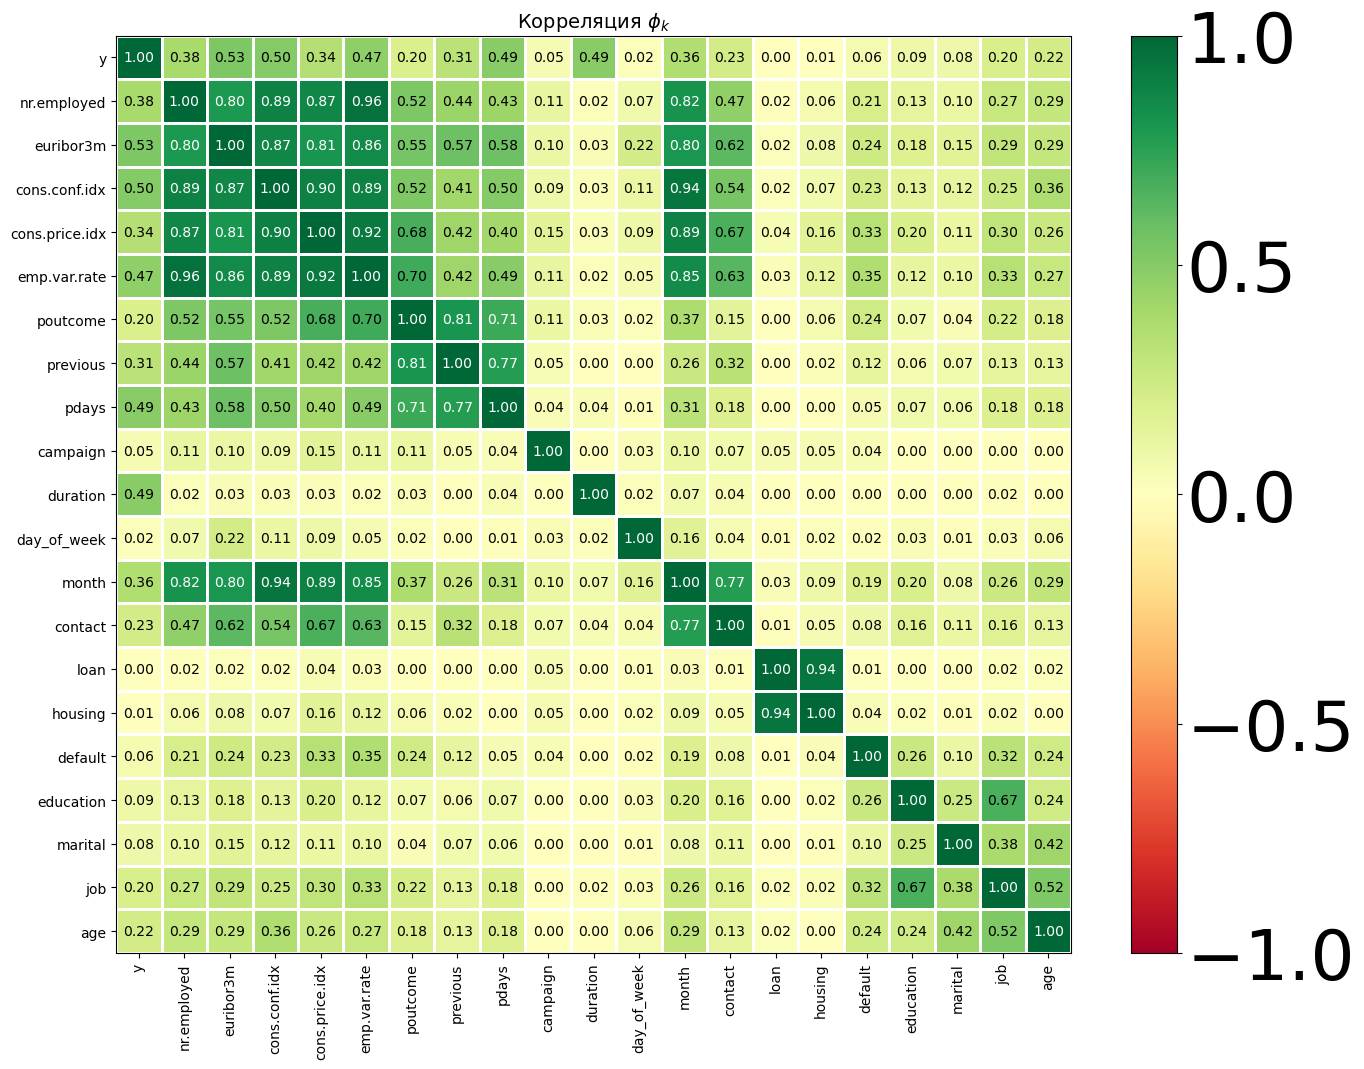

In [29]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(15, 12)
)

 ## Data preparation

 ### Prepare numerical and categorial columns

In [33]:
df = pd.get_dummies(df, drop_first=True)

# Select a features and target
features = df.drop(['y'], axis=1)
target = df['y']

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(features, target)


# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data y
1    29263
0    29196
Name: count, dtype: int64

Test data y
0    7341
1    7274
Name: count, dtype: int64


 #### Write the function for metrics

In [36]:
def metrics(predictions, target):
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    roc = roc_auc_score(target, predictions)
    return {'accuracy': accuracy, 'precision': precision, 'recal': recall, 'f1': f1, 'roc': roc}

 #### Train LogisticRegression model¶

In [39]:
max_iter = [50, 100, 150]                      
solvers = ['liblinear', 'newton-cg', 'lbfgs'] 
best_result = 0
logistic_regres, best_iter, best_solver = None, None, None

for iter in max_iter:
    for solver in solvers:
        model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=iter, solver=solver)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            logistic_regres = metrics(predictions, target_test)
            best_iter = iter
            best_solver = solver


print(f'The best parameters: max_iter={best_iter}, solver={best_solver}')
print('Test data', logistic_regres)

The best parameters: max_iter=150, solver=lbfgs
Test data {'accuracy': 0.9289086554909339, 'precision': 0.9300593185266933, 'recal': 0.9268627990101732, 'f1': 0.928458307512222, 'roc': 0.9288993194070073}


 #### Train DecisionTree Model

In [41]:
best_result = 0
best_depth = 0
dec_tree = None
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = recall_score(target_test, predictions)
    #print(depth, result)
    if best_result < result:
        dec_tree = metrics(predictions, target_test)
        best_depth = depth
        best_result = result

print(f'The best parameters: depth={best_depth}')
print('Test data', dec_tree)

The best parameters: depth=8
Test data {'accuracy': 0.9109818679438932, 'precision': 0.886301901435778, 'recal': 0.9419851525982953, 'f1': 0.913295568143952, 'roc': 0.9111233486734835}


 #### Train Randomforest Model

In [43]:
best_result, best_depth, best_est = 0, 0, 0
rand_forest = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if best_result < result:
            rand_forest = metrics(predictions, target_test)
            best_depth = depth
            best_est = est
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', rand_forest)

The best parameters: depth=8, est=40
Test data {'accuracy': 0.9204242216900445, 'precision': 0.8801791713325868, 'recal': 0.9725048116579599, 'f1': 0.9240415387629809, 'roc': 0.9206618868261193}


 #### Train KNeighborsClassifier model

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

best_result, best_n_neighbors, best_metric = 0, 0, ''
knn = None

# Перебор параметров
for n_neighbors in range(1, 21):  # Перебор от 1 до 20 соседей
    for metric in ['euclidean', 'manhattan', 'minkowski']:  # Разные метрики
        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        
        if best_result < result:
            knn = metrics(predictions, target_test)
            best_n_neighbors = n_neighbors
            best_metric = metric
            best_result = result

print(f'The best parameters: n_neighbors={best_n_neighbors}, metric={best_metric}')
print('Test data metrics:', knn)

The best parameters: n_neighbors=1, metric=manhattan
Test data metrics: {'accuracy': 0.9339719466301745, 'precision': 0.9320641008081085, 'recal': 0.9355237833379159, 'f1': 0.9337907375643225, 'roc': 0.9339790282988448}


 #### Train XGBlassifier

In [48]:
from xgboost import XGBClassifier

best_result, best_depth, best_est, best_learning_rate = 0, 0, 0, 0

xgb = None
pos_weight = sum(target_train == 0) / sum(target_train == 1)

for est in range(10, 110, 10):
    for depth in range(1, 10):
        for learning_rate in [0.01, 0.1, 0.2]:  
            model = XGBClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                learning_rate=learning_rate,
                scale_pos_weight=pos_weight
            )
            model.fit(features_train, target_train)
            predictions = model.predict(features_test)
            result = recall_score(target_test, predictions)
            
            if best_result < result:
                xgb = metrics(predictions, target_test)
                best_depth = depth
                best_est = est
                best_learning_rate = learning_rate
                best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}, learning_rate={best_learning_rate}')
print('Best F1 Score:', xgb)

The best parameters: depth=9, est=20, learning_rate=0.1
Best F1 Score: {'accuracy': 0.938761546356483, 'precision': 0.9127733920020706, 'recal': 0.9696178168820456, 'f1': 0.9403373108459436, 'roc': 0.9389023562001836}


 #### Train LGBMregressor Model

In [51]:
best_est = 0
best_result = 0
best_depth = 0
lgbm = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = LGBMClassifier(random_state=12345, max_depth=depth, num_leaves=31, n_estimators=est, learning_rate=0.2, boosting_type='gbdt', verbose=-1) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predicted)
        #print(est, depth, result)
        if result > best_result:
            lgbm = metrics(predicted, target_test)
            best_est = est
            best_depth = depth
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', lgbm)

The best parameters: depth=6, est=20
Test data {'accuracy': 0.9339719466301745, 'precision': 0.9071898799535304, 'recal': 0.9661809183392907, 'f1': 0.9357566074162839, 'roc': 0.934118929405308}


 #### Train Catboost Model

In [53]:
best_est = 0
best_result = 0
best_depth = 0
cat_boost = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = CatBoostClassifier(random_state=12345, max_depth=depth, n_estimators=est, learning_rate=0.2, verbose=0) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
            cat_boost = metrics(predictions, target_test)

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', cat_boost)

The best parameters: depth=1, est=10
Test data {'accuracy': 0.9522408484433801, 'precision': 0.9461329715061059, 'recal': 0.9586197415452296, 'f1': 0.9523354274788309, 'roc': 0.9522699579541977}


 #### Train MLPClassifier Model

In [55]:
best_est = 0
best_result = 0
best_hidden_layer_size = 0
best_learning_rate = 0
mlp_model = None

# Перебор гиперпараметров
for hidden_layer_size in [(10,), (20,), (30,)]:  # Количество нейронов в одном скрытом слое
    for learning_rate in [0.01, 0.1, 0.2]:  # Скорости обучения
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_size, learning_rate_init=learning_rate,
                              max_iter=500, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)

        if result > best_result:
            best_result = result
            best_hidden_layer_size = hidden_layer_size
            best_learning_rate = learning_rate
            mlp_model = metrics(predictions, target_test)

print(f'The best parameters: hidden_layer_size={best_hidden_layer_size}, learning_rate={best_learning_rate}')
print('Test data accuracy:', mlp_model)

The best parameters: hidden_layer_size=(30,), learning_rate=0.2
Test data accuracy: {'accuracy': 0.9089291823469039, 'precision': 0.8558256496227996, 'recal': 0.9825405554028045, 'f1': 0.914816, 'roc': 0.9092651012949181}


 #### Neuronet Keras¶

In [64]:
# Convert features and target to Tensor 
X_train = torch.from_numpy(features_train).float()
X_test = torch.from_numpy(features_test).float()

y_train = torch.from_numpy(target_train.values).float()
y_test = torch.from_numpy(target_test.values).float()

/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_7528/508773829.py:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:212.)
  X_train = torch.from_numpy(features_train).float()


In [68]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    Input(shape=[X_train.shape[1]]),
    Dense(42, activation='relu'),
    BatchNormalization(),
    Dense(20, activation='relu'),
    BatchNormalization(),
    Dense(15, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])
optimizer = Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Model training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=100,
    shuffle = True,
    callbacks=[early_stopping],
    verbose=0
)

In [71]:
# Predictions on validation data
y_pred = model.predict(X_test)

# Converting predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calling your metrics function
net_keras = metrics(y_pred_binary, y_test)

# Outputting the results of the metrics
print(net_keras)

457/457 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
{'accuracy': 0.9432774546698597, 'precision': 0.9412570176639737, 'recal': 0.9450096233159198, 'f1': 0.9431295877066612, 'roc': 0.9432853592672774}


 ### Conclusion

In [73]:
# Build a table for total

model_metrics = [logistic_regres, dec_tree, rand_forest, lgbm, cat_boost, xgb, knn, mlp_model, net_keras]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'LGBM', 'CatBoost', 'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier', 'NeuroNet_Keras'])
print(total.sort_values(by='accuracy', ascending=False))

                      accuracy  precision     recal        f1       roc
CatBoost              0.952241   0.946133  0.958620  0.952335  0.952270
NeuroNet_Keras        0.943277   0.941257  0.945010  0.943130  0.943285
XGBClassifier         0.938762   0.912773  0.969618  0.940337  0.938902
LGBM                  0.933972   0.907190  0.966181  0.935757  0.934119
KNeighborsClassifier  0.933972   0.932064  0.935524  0.933791  0.933979
LogisticRegression    0.928909   0.930059  0.926863  0.928458  0.928899
RandomForest          0.920424   0.880179  0.972505  0.924042  0.920662
DecisionTree          0.910982   0.886302  0.941985  0.913296  0.911123
MLPClassifier         0.908929   0.855826  0.982541  0.914816  0.909265


In [77]:
import optuna

def objective(trial):
    # Defining ranges for hyperparameters
    iterations = trial.suggest_int('iterations', 1000, 2000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1, log=True)
    depth = trial.suggest_int('depth', 4, 12)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True)
    random_strength = trial.suggest_float('random_strength', 1e-5, 10)
    border_count = trial.suggest_int('border_count', 1, 255)
    bagging_temperature = trial.suggest_float('bagging_temperature', 0, 10)

    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        random_strength=random_strength,
        border_count=border_count,
        bagging_temperature=bagging_temperature,
        verbose=0
    )

    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)  # Use the validation set
    accuracy = accuracy_score(target_test, y_pred)

    return accuracy

# Creating an Optuna study object
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Getting the best parameters
best_params = study.best_params
print(best_params)

[I 2025-03-31 19:03:06,087] A new study created in memory with name: no-name-0976aedd-70c6-459b-a788-8100ffa894e0
[I 2025-03-31 19:03:34,874] Trial 0 finished with value: 0.9529934998289429 and parameters: {'iterations': 1728, 'learning_rate': 0.032497845706677936, 'depth': 12, 'l2_leaf_reg': 1.784252670607199e-05, 'random_strength': 8.832633126208362, 'border_count': 64, 'bagging_temperature': 4.819299910413078}. Best is trial 0 with value: 0.9529934998289429.
[I 2025-03-31 19:03:52,797] Trial 1 finished with value: 0.9520355798836811 and parameters: {'iterations': 1936, 'learning_rate': 0.013413589145344507, 'depth': 8, 'l2_leaf_reg': 0.0001353402203688695, 'random_strength': 8.426150893301536, 'border_count': 79, 'bagging_temperature': 9.215469736455502}. Best is trial 0 with value: 0.9529934998289429.
[I 2025-03-31 19:03:57,734] Trial 2 finished with value: 0.945740677386247 and parameters: {'iterations': 1028, 'learning_rate': 0.045190427259182, 'depth': 4, 'l2_leaf_reg': 8.907303

{'iterations': 1250, 'learning_rate': 0.05189065892923021, 'depth': 10, 'l2_leaf_reg': 0.009270194116720249, 'random_strength': 3.9756865685839036, 'border_count': 187, 'bagging_temperature': 7.232216993400661}


In [79]:
model = CatBoostClassifier(

    iterations=1250,

    learning_rate=0.05189065892923021,

    depth=10,

    l2_leaf_reg=0.009270194116720249,

    random_strength=3.9756865685839036,

    border_count=187,

    bagging_temperature=7.232216993400661,
    
    verbose=0

)



model.fit(features_train, target_train)

y_pred = model.predict(features_test)
valid_metrics = metrics(y_pred, target_test)

x_pred = model.predict(features_train)
train_metrics = metrics(x_pred, target_train)

print(f"Train metrics: {train_metrics}")

print(f"Valid metrics: {valid_metrics}")

Train metrics: {'accuracy': 0.9999828939940814, 'precision': 1.0, 'recal': 0.9999658271537436, 'f1': 0.999982913284921, 'roc': 0.9999829135768719}
Valid metrics: {'accuracy': 0.9572357167293876, 'precision': 0.9501692620176032, 'recal': 0.9646686829804784, 'f1': 0.9573640766764445, 'roc': 0.9572696364091875}
